## Identifying Duplicate Questions

Over 100 million people visit Quora every month, so it's no surprise that many people ask similar (or the same) questions. Various questions with the same intent can cause people to spend extra time searching for the best answer to their question, and make writers to answer multiple versions of the same question. Quora uses random forest to identify duplicated questions to provide a better experience to active seekers and writers, and offer more value to both of these groups in the long term.

We are going to build the similar model during this project!

In [61]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rcParams

In [2]:
df = pd.read_csv("data/train.csv")

### Exploration

In [12]:
print(df.shape)
df.head()

(404290, 6)


,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [13]:
# remove id's - (may need to put order back in somehow later?)
q=df[['question1', 'question2', 'is_duplicate']]
q.columns = ['q1', 'q2', 'label']
print(q.shape)
q.head()

(404290, 3)


,q1,q2,label
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [16]:
q.dtypes


q1       object
q2       object
label     int64
dtype: object

### Missing Values

In [19]:
q.isnull().sum()

q1       1
q2       2
label    0
dtype: int64

In [21]:
q.iloc[q[q['q1'].isnull()].index.tolist()]

,q1,q2,label
363362,NaN,My Chinese name is Haichao Yu. What English na...,0


In [22]:
q.iloc[q[q['q2'].isnull()].index.tolist()]

,q1,q2,label
105780,How can I develop android app?,NaN,0
201841,How can I create an Android app?,NaN,0


In [134]:
df.iloc[0:25]['question2'].tolist()

['What is the step by step guide to invest in share market?',
 'What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?',
 'How can Internet speed be increased by hacking through DNS?',
 'Find the remainder when [math]23^{24}[/math] is divided by 24,23?',
 'Which fish would survive in salt water?',
 "I'm a triple Capricorn (Sun, Moon and ascendant in Capricorn) What does this say about me?",
 'What keeps childern active and far from phone and video games?',
 'What should I do to be a great geologist?',
 'When do you use "&" instead of "and"?',
 'How do I hack Motorola DCX3400 for free internet?',
 'What are some of the things technicians can tell about the durability and reliability of Laptops and its components?',
 'How can I see all my Youtube comments?',
 'How can you make physics easy to learn?',
 'What was your first sexual experience?',
 'What are the laws to change your status from a student visa to a green card in the US? How do they compare to 

### Label spread

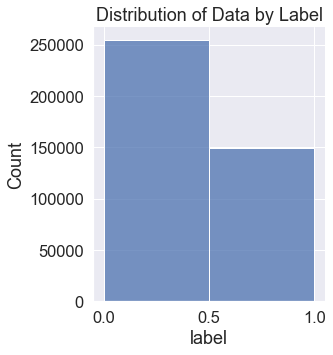

In [143]:
sns.set(font_scale=1.5)
# fig, ax = plt.subplots()
# ax.plot(x, y, marker='s', linestyle='none', label='small')
# ax.legend(loc='upper left', bbox_to_anchor=(0, 1.1))

sns.displot(x=q.label, bins=2).set(title='Distribution of Data by Label');

### Character Counts

In [89]:
# Find lengths min and max of questions
q = q.dropna()
q['q1_length'] = q.q1.map(lambda x: len(x))
q['q2_length'] = q.q2.map(lambda x: len(x))

print("max lengths: ",max(q1_length), max(q2_length))
print("min lengths: ", min(q1_length), min(q2_length))

max lengths:  623 1169
min lengths:  1 1


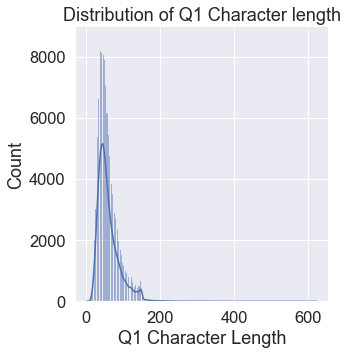

In [151]:

# sns.set(rc={'figure.figsize':(18,15)})
sns.set(font_scale=1.5)

p = sns.displot(x=q1_length, bins=1000, kde=True).set(title='Distribution of Q1 Character length');
p.set( xlabel = "Q1 Character Length");

(5.0, 175.0)

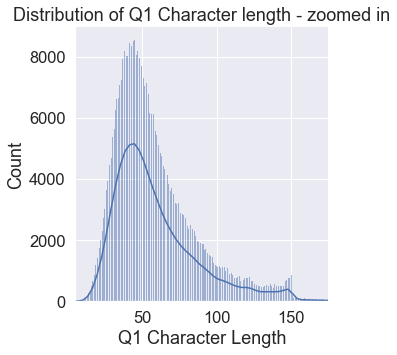

In [170]:
sns.set(font_scale=1.5)

p = sns.displot(x=q1_length, bins=1000, kde=True).set(title='Distribution of Q1 Character length - zoomed in');
p.set( xlabel = "Q1 Character Length");
plt.xlim(5, 175)

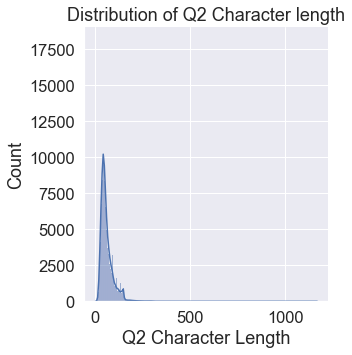

In [172]:
sns.set(font_scale=1.5)
p= sns.displot(x=q2_length, bins=1000,kde=True).set(title='Distribution of Q2 Character length');
p.set(xlabel = "Q2 Character Length");
# plt.xlim(5, 175)

(5.0, 175.0)

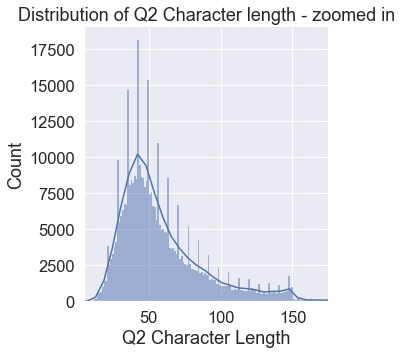

In [173]:
sns.set(font_scale=1.5)
p= sns.displot(x=q2_length, bins=1000,kde=True).set(title='Distribution of Q2 Character length - zoomed in');
p.set(xlabel = "Q2 Character Length");
plt.xlim(5, 175)

In [165]:


# bins = 1000
# # rcParams['figure.figsize'] = 18,8
# fig, ax = plt.subplots(figsize = (10,6))
# ax.xticks= range(1,1200, 25)
# # plt.hist(x=q1_length, bins=bins);
# ax.hist(x=q1_length, bins=bins);
# plt.show()

In [164]:
# bins = 1000
# # rcParams['figure.figsize'] = 18,8
# fig, ax = plt.subplots(figsize = (10,6))
# ax.xticks= range(1,1200, 25)
# # plt.hist(x=q1_length, bins=bins);
# ax.hist(x=q1_length, bins=bins, range=(5,175));
# plt.show()

In [163]:
# xticks= range(1,1200, 25)
# plt.hist(x=q2_length, bins=bins);
# plt.show()

In [162]:
# xticks= range(1,1200, 25)
# plt.hist(x=q2_length, bins=bins, density = True, range = (3,175));
# plt.show()

In [166]:
# # box plot! 
# sns.boxplot(x=q.label, y=['q1','q2'], data=q)
# plt.title('Box Plot - Total Words in Both Questions')
# plt.xlabel('Class label')
# plt.ylabel('Total words')

In [88]:
# looks like 150 is a good number of words preprocessing for sentence encoding 
# do I check this after processing? maybe reduced
len(q.iloc[2]['q1'])

73

In [169]:
# q['q1'][(q['q1_length'] < 10) and (q['q1_length'].split() >2)].tolist()
less_char_q1 = q['q1'][(q['q1_length'] < 10)].tolist()
print(len(less_char_q1))
less_char_q1

81


['.',
 '?',
 'deleted',
 '?',
 'deleted',
 'HH',
 'What?',
 'deleted',
 'deleted',
 'Na',
 "I'm ",
 'grammar',
 'How long?',
 'What?',
 'lol ?',
 'Is?',
 'Deleted.',
 'How I am?',
 'Who Am I?',
 '?',
 'ok ?',
 '?',
 'What?',
 'i',
 'What',
 'o',
 '?',
 'deleted',
 'Deleted.',
 'o',
 'A',
 'Who is?',
 'Nana',
 '111',
 'Hh ',
 "I'm ",
 'spam',
 '[removed]',
 'Am I fat?',
 'Which',
 '?',
 '‘',
 'deleted',
 'I',
 'Deleted.',
 '?',
 'Can?',
 'Easy PHP?',
 '?',
 'Aaas',
 'Marriage',
 'deleted',
 'sss',
 'deleted',
 'lol ?',
 'Yf v. B.?',
 '?',
 'hi',
 'Why?',
 'delete',
 'Ok',
 '?',
 'civil',
 '…..',
 'What?',
 'Cloning?',
 'Why?',
 'Error',
 'My',
 'How',
 'Life:',
 'My',
 'lol ?',
 'Who is',
 'Deleted.',
 'Q?',
 'Deleted.',
 'H',
 'deleted',
 'no',
 '?']

In [119]:
q[(q['q1_length'] < 10)& (q['label'] == 1)]

,q1,q2,label,q1_length,q2_length
175282,Hh,HH,1,3,2
328745,lol ?,lol,1,5,3


In [171]:
less_char_q2 =q['q2'][q['q2_length'] < 10].tolist()
print(len(less_char_q2))
less_char_q2

26


['Big data?',
 '…………..',
 'What?',
 '?',
 'What?',
 'Hh',
 'Does?',
 'null ',
 'Delete',
 'Deleted.',
 'HH',
 'Why',
 '[removed]',
 'o',
 'Null ',
 'Edit',
 '????',
 'deleted',
 'Spam',
 'Hh ',
 'What?',
 'Deleted.',
 'lol',
 'Spam',
 '…………..',
 'What is']

In [116]:
q[q['q2_length'] < 10]

,q1,q2,label,q1_length,q2_length
16479,What is big data science?,Big data?,1,25,9
20072,How could I solve this?,…………..,0,23,6
46596,How To Edit DNA?,What?,0,16,5
47056,Is there anywhere in the world offering pain m...,?,0,117,1
51909,What should yellow taxis do to face competitio...,What?,0,66,5
109009,How do I make a box that I can put my phone in...,Hh,0,113,2
130637,Does the Quran surah 23: 5-6 prove that Allah ...,Does?,0,85,5
141281,Deleted.,null,0,8,5
144506,How beautiful do you think you are?,Delete,0,35,6
145000,Me and my girlfriend wish to go out and do 'st...,Deleted.,0,134,8


In [123]:
q['q2'][(q['q2_length'] > 300)].count()

183

In [126]:
q['q2'][(q['q2_length'] > 500)].tolist()

['I have been married almost 15 years. We have two children, 11 and 8. My childhood was horrible, seven years of sexual, physical, and mental/emotional abuse followed by instability and low self esteem issues as a teen. My husband met me after I began dealing with my childhood and knew all about my issues. He knew what would end our marriage, yet he did it and lied about it multiple times. I was pregnant and did not leave. We tried to make it work. We had another child. We have been through MANY "situations" in our marriage and as parents. For the past 6-8 years we have just been living as parents. Not lovers. In the past I tried everything to make our marriage work. I finally decided to be done with it. Now he says he loves me and wants to make it work. But he is manipulative and can be so mean. He uses my children to cause me pain and stress. He knows that they are the only reason I stay. We are in counciling, but I really have no "love" feelings for him. I told him I want a divorce,

In [131]:
to_drop = q[(q['q2_length'] > 500)].index.tolist()
q = q.drop(to_drop)

In [132]:
q['q2'][(q['q2_length'] > 400)].tolist()

['I have a question in a Cisco Exam, It said who could be identified as a Cisco internal SME (Subject Matter Expert)? The options i have are:  1. The Cisco service industry consultant.  2. The engineer which was assigned to the customer.  3. The channel partner program manager.  4. The compensation analyst in the region. I was confused about the answers between 1 and 3. Is there anyone could direct me somehow and tell me why a little bit. Many Thanks!!!   : )',
 "Xperia zr screen cracked - I went to the nearest authorized service centre in salt lake and they asked me to pay 11000 bucks (too high for a 2 year old mobile) as the repairment cost of my damaged screen. So I'm confused from where I'll get my mobile repaired. Either I can purchase the material from eBay or visit a local store as an alternative. It's really difficult to trust a local store regarding material and the cost. Please provide an approximation of the price and advise me for the same.",
 "I'm a fourth year student who

### Punctuation

In [84]:
import string

punctuations = string.punctuation

print(punctuations)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
# yeah - I'm going to get rid of them all! (except &?)

### Cleaning

- Tokenization
- Stopwords cleaning
- Removing punctuation
- Normalizing
- Stemming

In [136]:
# Import ALL the libraries
import pandas as pd
import numpy as np

# for stopword removal 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# for punctuation removal
import string

# for tokenizing into words
import re
from nltk.tokenize import word_tokenize

# for stemming
nltk.download('punkt')
from nltk.stem import PorterStemmer

# for lematizing
from nltk.stem import WordNetLemmatizer 

# FEATURE ENGINEERING

# Bag of words count vectorizer
from sklearn.feature_extraction.text import CountVectorizer

# TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lilakelland/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lilakelland/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# read fresh data

df = pd.read_csv("data/train.csv")

#### Clean data

In [ ]:
# drop columns and rename to q

q= df[['question1', 'question2', 'is_duplicate']]
q.columns = ['q1', 'q2', 'label']

In [ ]:
# drop null values

q.dropna()

In [ ]:
# remove q with < 10 characters in either q1 or q2

to_drop = q[(q['q2_length'] < 10) | (q['q1_length'] > 10)].index.tolist()
q = q.drop(to_drop)

# drop anything > 500

to_drop = q[(q['q2_length'] > 500) | (q['q1_length'] > 500)].index.tolist()
q = q.drop(to_drop)

# truncate the rest ( most in first part?)

In [ ]:
# remove punctuation

punctuations = string.punctuation
def remove_punct(text):
    text = "".join([char for char in text if char not in string.punctuation])
    return text


In [ ]:
# tokenize into words

def tokenize(text):
    tokens = text.split()
    #tokens2 = re.split('\W+', text)
    #tokens3 = re.findall(r'\S+', text)
    return tokens

In [ ]:
#  Stop words

stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(tokenized_text):    
    text = [word for word in tokenized_text if word not in stopwords]
    return text

In [ ]:
# stemming OR lemmatizing

lemmatizer = WordNetLemmatizer() 
# ps = PorterStemmer() 
   
sentence="Programmers have programed by learning how to programatically program"
words = tokenize(sentence) 
   
for w in words: 
#     print(w, " : ", ps.stem(w)) 
    lemmatizer.lemmatize(w)

In [ ]:
# *** .apply 

In [ ]:
# Encompassing function to clean all 

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation]) 
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]
    #lememtization
    #stemming
    return text

### Feature Engineering

- tf-idf
- word2vec
- word count
- number of the same words in both questions
- ....

In [ ]:
def create_doc_term_matrix(message_list,vectorizer):
    doc_term_matrix = vectorizer.fit_transform(message_list)
    return pd.DataFrame(doc_term_matrix.toarray(),
                    columns = vectorizer.get_feature_names())

In [ ]:
# TfIDF vectorizer
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(q[['q1', 'q2']])

In [ ]:
# try bag of words
count_vect = CountVectorizer()
X_tfidf = tfidf_vect.fit_transform(q[['q1', 'q2']])

In [ ]:
# continuous bag of words(cbow) or skipgram??context of words (order) - these are the below right?
# glove word embedding 
# word2vec word embedding (gensim)
w2v_model = gensim.models.Word2Vec(X_train,
                                   size=100, # can change this if more complicated - can increase, less, decrease
                                   window=5,
                                   min_count=2) # on

In [ ]:
# pad with zeros - 150 

In [ ]:
# bigrams

### Modeling

Different modeling techniques can be used:

- logistic regression
- XGBoost
- LSTMs
- etc

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
# import xgboost as xgb
# xg_reg = xgb.XGBRegressor(

from sklearn.pipeline import Pipeline


In [ ]:
# Initialise Model Object
classifier = LinearSVC()

In [ ]:
#build pipeline
nlp_pipeline = Pipeline([
    ('preprocessing', tfidf),
    ('model', BernoulliNB())
], verbose = True)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( reviews['review'], reviews['label'], 
                                                    test_size = 0.2, random_state = 42)


In [ ]:
%%time
#fit pipeline
nlp_pipeline.fit(X_train, y_train)

train_accuracy = nlp_pipeline.score(X_train,y_train)
test_accuracy = nlp_pipeline.score(X_test,y_test)

In [ ]:
# predict
nlp_pipeline.predict(['Welcome to the terrible world of data science'])